# Wrangling and Analyzing WeRateDogs Twitter account Data From(2015-2017) 

## **Table Of Contents**  <a id='contents'></a>

<ul>
<li><a href="#import">Importing Python Libraries</a></li>       
<br><li><a href="#gather">Gathering The Datasets</a></li>
    <a href="#archive">I. WeRateDogs Twitter Archive Dataset</a>
    <br><a href="#pred">II. Image Prediction Dataset</a>
    <br><a href="#api">IIII. Querying Twitter API</a><br>
<br><li><a href="#assess">Assessing The Datasets</a></li>
    <a href="#visual">I. Visual Assessment Of The Datasets</a>
    <br><a href="#pro">II. Programmatic Assessment Of The Datasets</a>
    <br><a href="#quality">III. Quality Issues</a>
    <br><a href="#tidy">IV. Tidiness Issues</a><br>
<br><li><a href="#clean">Cleaning The Datasets</a></li>    
<br><li><a href="#data">Data Insight and Visualization</a></li>
    
</ul>

## Importing the necessary libraries <a id='import'></a>

In [335]:
#Loading of data, wrangling and manipulation
import pandas as pd
import numpy as np
import re
import json

#Scraping data off twitter
import tweepy

#Interacting with configuration file that holds our API keys
from configparser import ConfigParser

#Downloading a dataset programmatically from a website.
import requests

#Displaying of image and Visualization
from IPython.display import Image
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import seaborn as sns
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
from PIL import Image

#Filtering out error messages
import warnings
warnings.filterwarnings('ignore')


<a href="#contents">Back to contents</a>      


## Gathering the needed datasets <a id='gather'></a>

#### Reading in the WeRateDogs Twitter archive dataset <a id='archive'></a>

In [74]:
tweets = pd.read_csv(r'C:\Users\JohnInalegwu\Downloads\twitter-archive-enhanced.csv')

tweets.head(1)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None


####  Importing the The tweet image predictions dataset   <a id='prep'></a>

We do this by first downloading the data as a text file from a URL using request

In [4]:
url='https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv'

response = requests.get(url, stream = True)
with open("image_predictions.tsv", 'wb') as file:
    file.write(response.content)
    file.close()
print("The tweet image predictions has been successfully downloaded from Udacity's servers!!!")

The tweet image predictions has been successfully downloaded from Udacity's servers!!!


##### Reading in the image predictions dataset downloaded above

In [5]:
img_pred = pd.read_csv('image_predictions.tsv', sep='\t')

img_pred.head(1)

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True


#### Querying Twitter API to obtain the likes and retweets count of the available tweets in the twitter archive <a id='api'></a>

The WeRateDogs Twitter archive dataset lacks some necessary data that could drive more insight into our analysis. The needed data lacking are each tweet's retweet count and favorite ("like") count. Using the tweet IDs in the WeRateDogs Twitter archive, we would be querying the Twitter API for each tweet's JSON data using Python's Tweepy library.

##### Getting our twitter api keys

In [6]:
config = ConfigParser()
config.read("config.ini")

api_key = config['twitter']['api_key']
api_key_secret = config['twitter']['api_key_secret']

access_token = config['twitter']['access_token']
access_token_secret = config['twitter']['access_token_secret']

##### Creating the api authenticator

In [7]:
auth = tweepy.OAuthHandler(api_key, api_key_secret)

auth.set_access_token(access_token, access_token_secret)

api = tweepy.API(auth)

##### Getting all tweet id to be queried from the WeRateDogs Twitter archive

In [84]:
id = tweets['tweet_id']

##### Looping through all tweet id to obtain the  tweet's JSON data and excluding all invalid tweets id to avoid errors

In [85]:
with open('tweets_queried.txt', 'w') as file:
    for i in id:
        try:
            tweets_status = api.get_status(i, tweet_mode='extended')
            json.dump(tweets_status._json, file)
        except Exception:
            pass
        file.write('\n')

#####  Deleting all blank/empty lines in our text file

In [104]:
with open('tweets_queried.txt', 'r', encoding='utf-8') as inFile,\
     open('new_tweets_queried.txt', 'w', encoding='utf-8') as outFile:
    for line in inFile:
        if line.strip():
            outFile.write(line)

##### Creating an empty list 'data'

##### Looping through the JSON file, to get the tweet id, favorite count and retweet count

##### Appending the informations to the empty list created 

In [105]:
data = []

with open ('new_tweets_queried.txt', 'r') as files:
    for file in files.readlines():
        json_file =json.loads(file)
        
        data.append([json_file['id'], json_file['favorite_count'],json_file['retweet_count']])
        
columns = ['id', 'favorite_count', 'retweet_count']

##### Creating the dataset and saving it as csv file

In [106]:
df = pd.DataFrame(data, columns=columns)

df.to_csv('twt_rt_nd_likes.csv', index = False)

##### Reading in the twitter  queried api dataset

In [110]:
rt_likes = pd.read_csv('twt_rt_nd_likes.csv')

rt_likes.head(1)

,id,favorite_count,retweet_count
0,892420643555336193,33789,7001


<a href="#contents">Back to contents</a> 

## Assessing the data <a id='assess'></a>

#### Visual Assessment of the three datasets    <a id='visual'></a>

##### Twitter archive dataset

In [116]:
tweets.head(3)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None


Taking a look at the first three rows in our dataset, we can spot certain issues, like unwanted columns, missing values, and wrong structure of the datetime column. All of these issues and even more were discussed more <a href="#quality">here</a>.

##### Image prediction dataset

In [118]:
img_pred.head(3)

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True


Visually Assessing theimage predction dataset, all seems to be perfect, but for the sake of my analysis, I would be reducing the number of image predictions made for each Dog from three to **only** one. As I would only be concerned with the top most predictions for each Dog.

##### Queried twitter api dataset

In [121]:
rt_likes.head(3)

,id,favorite_count,retweet_count
0,892420643555336193,33789,7001
1,892177421306343426,29302,5299
2,891815181378084864,22034,3477


Looking at this dataset, we can see that the column name that holds the unique twitter id for each tweet is different in this dataset, compared to the other two datasets. So, this is an issue we would be addressing, together with the 'favorite_count' column name that I would like to change into something more easy to identify or apprehend for my audience.

#### Programmatic Assessment <a id='pro'></a>

For each of our dataset we would be programmatically assessing it to ascertain any further issues with the datasets.
So, we would be checking out the following:

Number of Rows and columns in each dataset

The data type of each column

Number of missing values from each column

The duplicates in the dataset

##### Twitter archive dataset

In [125]:
print(f'The Twitter archive dataset has {tweets.shape[0]} rows and {tweets.shape[1]} columns')

The Twitter archive dataset has 2356 rows and 17 columns


In [169]:
print('From the below output we can see that "timestamp" column has a wrong date\
type "object" \nand needs to be changed into a "datetime" data type:')
tweets.dtypes

From the below output we can see that "timestamp" column has a wrong datetype "object" 
and needs to be changed into a "datetime" data type:


tweet_id                        int64
in_reply_to_status_id         float64
in_reply_to_user_id           float64
timestamp                      object
source                         object
text                           object
retweeted_status_id           float64
retweeted_status_user_id      float64
retweeted_status_timestamp     object
expanded_urls                  object
rating_numerator                int64
rating_denominator              int64
name                           object
doggo                          object
floofer                        object
pupper                         object
puppo                          object
dtype: object

In [160]:
print(f'Listed below is {len(tweets.isnull().sum()[tweets.isnull().sum() > 0])} \
out of {tweets.shape[1]} columns in the dataset, and out of the avilable \
{tweets.shape[0]} rows, \nthey have the following number of rows with missing values:')


tweets.isnull().sum()[tweets.isnull().sum() > 0]

Listed below is 6 out of 17 columns in the dataset, and out of the avilable 2356 rows, 
they have the following number of rows with missing values:


in_reply_to_status_id         2278
in_reply_to_user_id           2278
retweeted_status_id           2175
retweeted_status_user_id      2175
retweeted_status_timestamp    2175
expanded_urls                   59
dtype: int64

In [189]:
print(f'There are available {tweets.duplicated().sum()} number of duplicate rows in this dataset.')

There are available 0 number of duplicate rows in this dataset.


##### Image prediction dataset

In [168]:
print(f'The Image prediction dataset has {img_pred.shape[0]} rows and {img_pred.shape[1]} columns')

The Image prediction dataset has 2075 rows and 12 columns


In [193]:
print('From the below output we can see that all columns in this dataset have the right \
data type.\n So, no changes needs to be made on the data types:')

img_pred.dtypes

From the below output we can see that all columns in this dataset have the right data type.
 So, no changes needs to be made on the data types:


tweet_id      int64
jpg_url      object
img_num       int64
p1           object
p1_conf     float64
p1_dog         bool
p2           object
p2_conf     float64
p2_dog         bool
p3           object
p3_conf     float64
p3_dog         bool
dtype: object

In [194]:
print(f'Listed below is the {img_pred.shape[1]} columns in the dataset, and out of the avilable \
{img_pred.shape[0]} rows, \nthey have the following number of rows with missing values:')


img_pred.isnull().sum()

Listed below is the 12 columns in the dataset, and out of the avilable 2075 rows, 
they have the following number of rows with missing values:


tweet_id    0
jpg_url     0
img_num     0
p1          0
p1_conf     0
p1_dog      0
p2          0
p2_conf     0
p2_dog      0
p3          0
p3_conf     0
p3_dog      0
dtype: int64

In [195]:
print(f'There are available {img_pred.duplicated().sum()} number of duplicate rows in this dataset.')

There are available 0 number of duplicate rows in this dataset.


##### Queried twitter api dataset

In [196]:
print(f'The Queried twitter api dataset has {rt_likes.shape[0]} rows and {rt_likes.shape[1]} columns')

The Queried twitter api dataset has 2033 rows and 3 columns


In [197]:
print('From the below output we can see that all columns in this dataset have the right \
data type.\n So, no changes needs to be made on the data types:')

rt_likes.dtypes

From the below output we can see that all columns in this dataset have the right data type.
 So, no changes needs to be made on the data types:


id                int64
favorite_count    int64
retweet_count     int64
dtype: object

In [198]:
print(f'Listed below is the {rt_likes.shape[1]} columns in the dataset, and out of the avilable \
{rt_likes.shape[0]} rows, \nthey have the following number of rows with missing values:')


rt_likes.isnull().sum()

Listed below is the 3 columns in the dataset, and out of the avilable 2033 rows, 
they have the following number of rows with missing values:


id                0
favorite_count    0
retweet_count     0
dtype: int64

In [199]:
print(f'There are available {rt_likes.duplicated().sum()} number of duplicate rows in this dataset.')

There are available 0 number of duplicate rows in this dataset.


### Quality issues   <a id='quality'></a>

1.  The 'timestamp' column in the twitter Archive dataset is an object datatype. This needs to be changed into a datetime column.


2.  Url links, and ratings are also present in 'text' column in the twitter Archive dataset, and they also appear in different individual columns. So, Url links and ratings too, would be removed from the texts.


3.  Aside the fact that the rating numerators are greater than the denominators in WeRateDogs. There are still some instances of inaccurate rating numerators and denominators. This is an error that occured while extracting the rating from the texts.


4. The 'text' column in the twitter Archive dataset, has certain features that are irrelevant to our analysis like Hashtags(#) and IG tags.


5. The 'name' column in the twitter Archive dataset has some invalid values like 'None', 'such', 
'a', 'quite', 'not', 'one', 'incredibly', 'mad', 'an', 'very', 'just', 'my', 'his', 'actually',
'getting', 'this', 'unacceptable', 'all', 'old', 'infuriating', 'the', 'by', 'officially', 
'life', 'light', 'space'. 
    These set of values above are invalid. Such values needs to be assigned a NaN values to avoid 
    skewing our analysis.



6. Data from retweet are also present in our twitter Archive dataset. Retweet data are just duplicates of the original data in our dataset but with a different timestamp. So, for our analysis only original tweets are to be considered. So, we would be dropping all retweets from our dataset.


7.  Over 324 entries in the image_predictions dataset are not dog ratings, therefore, are invalid in our dataset and should be dropped.


8. The id and favorite_count column in the retweet and likes dataset that I obtained from twitter needs to be renamed into 'tweet_id', 'like_count' respectively. 


9.  in_reply_to_status_id: 2278 null data, 
    in_reply_to_user_id: 2278 null data, 
    retweeted_status_id:  2175 null data, 
    retweeted_status_user_id: 2175 null data, 
    retweeted_status_timestamp: 2175 null data, 
    expanded_urls: 59 null data, 
        All of these columns listed above in our twitter Archive dataset have missing 
        values and would all be addressed as we continue the wrangling process.
        
        
10.  In our image_predictions dataset, we have 3 different columns, each stating the prediction, the prediction confident score and thirdly the conditional statement if the prediction is a Dog breed or not. Now we have these three set of columns repeated 3 times in the dataset. This affects the structure of the dataset. So, we would aim at colllapsing all six columns, leaving just three columns, which would have values for the 'dog_breed'(The predicted Dog), 'confidence_score'(The score of the prediction), and the 'prediction_rank'(The rank of the Dog prediction made). There would be no need for the boolean values stating if the prediction is a Dog or not as we would only be having predictions for Dogs in our dataset. 

### Tidiness issues  <a id='tidy'></a>

1. in_reply_to_status_id, 
   in_reply_to_user_id, 
   source, 
   retweeted_status_id, 
   retweeted_status_user_id, 
   retweeted_status_timestamp, 
   expanded_urls 
       The above are all listed columns that are irrelevant to our analysis.
       Therefore, affects the structure of our dataset to carry out further analytical 
       approach.
       
       
2. doggo, 
   floofer, 
   pupper, 
   puppo 
       These listed columns represent different dog growth stages. So, 
       instead of having different columns representing different stages, 
       why don't we just have a single column which states the stage of the dog?
       

3. The timestamp column, after the quality issues has been addressed. Then we focus more on the 
   structure issue of the column in our dataset. We would be splitting the existing timestamp column
   into two different columns of date and time, as we would be carrying out further analysis on 
   these two created columns independently.


<a href="#contents">Back to contents</a> 

### Cleaning Data    <a id='clean'></a>

##### Make copies of original pieces of data

In [200]:
tweets_copy =  tweets.copy()

img_pred_copy = img_pred.copy()

rt_likes_copy = rt_likes.copy()

#### Issue #1: Inaccurate datatype for timestamp column   - Quality Issue

Define: 

First we check out the current data type of the datetime column

Then we proceed by converting the column to datetime data type with the use of pd.to_datetime() and also applying it to our dataset.

Code:

##### Before cleaning the data

In [201]:
print(f'The data type of the timestamp column in this dataset is currently an \'{tweets_copy["timestamp"].dtypes}\' data type.\n Now we proceed into converting it into a datetime data type below.')

The data type of the timestamp column in this dataset is currently an 'object' data type.
 Now we proceed into converting it into a datetime data type below.


##### Converting to datetime data type

In [202]:
tweets_copy['timestamp'] = pd.to_datetime(tweets_copy['timestamp'])

Test:

##### After cleaning the data

In [203]:
print(f'The data type of the timestamp column in this dataset is currently a \'{tweets_copy["timestamp"].dtypes}\' data type.\n Our conversion of the data type was successful!')

The data type of the timestamp column in this dataset is currently a 'datetime64[ns, UTC]' data type.
 Our conversion of the data type was successful!


#### Issue #2: Removing Url links, hashtags and IG tags from texts - Quality Issue

Define:

Taking a look at some texts from our dataset before cleaning, to spot out our issues

secondly we applied regEx to all rows in our datset to replace all issues spotted by applying lambda function.

code:

##### Before cleaning

In [204]:
print('Below are the first six texts from our dataset before cleaning and we can see that each of these text possesses at\nleast one of the quality issues we addressed: \n')

n = 1
for text in tweets_copy['text'][:6]:
    print(str(n)+ '.  ' + text + '\n')
    n = 1 + n

Below are the first six texts from our dataset before cleaning and we can see that each of these text possesses at
least one of the quality issues we addressed: 

1.  This is Phineas. He's a mystical boy. Only ever appears in the hole of a donut. 13/10 https://t.co/MgUWQ76dJU

2.  This is Tilly. She's just checking pup on you. Hopes you're doing ok. If not, she's available for pats, snugs, boops, the whole bit. 13/10 https://t.co/0Xxu71qeIV

3.  This is Archie. He is a rare Norwegian Pouncing Corgo. Lives in the tall grass. You never know when one may strike. 12/10 https://t.co/wUnZnhtVJB

4.  This is Darla. She commenced a snooze mid meal. 13/10 happens to the best of us https://t.co/tD36da7qLQ

5.  This is Franklin. He would like you to stop calling him "cute." He is a very fierce shark and should be respected as such. 12/10 #BarkWeek https://t.co/AtUZn91f7f

6.  Here we have a majestic great white breaching off South Africa's coast. Absolutely h*ckin breathtaking. 13/10 (IG: tucker_

In [205]:
#Removes the Url link
tweets_copy['text'] = tweets_copy['text'].apply(lambda x: re.sub(r'https?:\/\/\S+', '', x))

#Removes the hashtag
tweets_copy['text'] = tweets_copy['text'].apply(lambda x: re.sub(r'#[^\s]+', '', x)  )

#Removes the IG tags
tweets_copy['text'] = tweets_copy['text'].apply(lambda x: re.sub(r'\(IG[^/]+', '', x)  )


Test:

###### After Cleaning

In [206]:
print('Below are the first six texts from our dataset after cleaning and we can see that non of these text possesses any\nof the quality issues we addressed: \n')

n = 1
for text in tweets_copy['text'][:6]:
    print(str(n)+ '.  ' + text + '\n')
    n = 1 + n

Below are the first six texts from our dataset after cleaning and we can see that non of these text possesses any
of the quality issues we addressed: 

1.  This is Phineas. He's a mystical boy. Only ever appears in the hole of a donut. 13/10 

2.  This is Tilly. She's just checking pup on you. Hopes you're doing ok. If not, she's available for pats, snugs, boops, the whole bit. 13/10 

3.  This is Archie. He is a rare Norwegian Pouncing Corgo. Lives in the tall grass. You never know when one may strike. 12/10 

4.  This is Darla. She commenced a snooze mid meal. 13/10 happens to the best of us 

5.  This is Franklin. He would like you to stop calling him "cute." He is a very fierce shark and should be respected as such. 12/10  

6.  Here we have a majestic great white breaching off South Africa's coast. Absolutely h*ckin breathtaking. 13/10 



#### Issue #3: Inaccurate rating numerators and denominators - Quality Issue

Define: 

Filter out specific incorrect ratings in our dataset by checking out the original ratings in the texts and also the rating numerator and denominator present in our dataset.

Secondly, we proceed towards extracting the original ratings present in the text. 

Code:

##### The texts of these data and their index

In [207]:
print('313: ' + tweets[tweets_copy['rating_numerator'] == 960]['text'][313])
print('\n1068 ' + tweets_copy[tweets_copy['rating_denominator'] == 11]['text'][1068])
print('\n1165 ' + tweets_copy[tweets_copy['rating_denominator'] == 20]['text'][1165])
print('\n1202 ' + tweets_copy[tweets_copy['rating_denominator'] == 50]['text'][1202])
print('\n2335: ' + tweets_copy[tweets_copy['rating_numerator'] == 1]['text'][2335])

313: @jonnysun @Lin_Manuel ok jomny I know you're excited but 960/00 isn't a valid rating, 13/10 is tho

1068 After so many requests, this is Bretagne. She was the last surviving 9/11 search dog, and our second ever 14/10. RIP 

1165 Happy 4/20 from the squad! 13/10 for all 

1202 This is Bluebert. He just saw that both  match ups are split 50/50. Amazed af. 11/10 

2335: This is an Albanian 3 1/2 legged  Episcopalian. Loves well-polished hardwood flooring. Penis on the collar. 9/10 


##### The rating_numerator	and rating_denominator of the above texts data before cleaning

In [208]:
tweets_copy[(tweets.index == 313) | (tweets_copy.index == 1068) | (tweets_copy.index == 1165) |
       (tweets_copy.index == 1202) | (tweets_copy.index == 2335)][['rating_numerator','rating_denominator']]

,rating_numerator,rating_denominator
313,960,0
1068,9,11
1165,4,20
1202,50,50
2335,1,2


From these scenarios we can see that in the process of extracting the exact ratings from the texts, numbers that were used as part of the texts to aid their narrartion and description were extracted in place of the actual ratings.

#### Cleaning:

In [209]:
tweets_copy['rating_denominator'].iloc[[313,1068,
                    1165,1202,2335]] = tweets_copy['text'].iloc[[313,1068,
                                    1165,1202,2335]].apply(lambda x: re.findall(r'\d+', x)[-1])
  
tweets_copy['rating_numerator'].iloc[[313,1068,
                    1165,1202,2335]] = tweets_copy['text'].iloc[[313,1068,
                                    1165,1202,2335]].apply(lambda x: re.findall(r'\d+', x)[-2])

Test: 

##### The rating_numerator and rating_denominator of the above texts data after cleaning

In [210]:
tweets_copy[(tweets.index == 313) | (tweets_copy.index == 1068) | (tweets_copy.index == 1165) |
       (tweets_copy.index == 1202) | (tweets_copy.index == 2335)][['rating_numerator','rating_denominator']]

,rating_numerator,rating_denominator
313,13,10
1068,14,10
1165,13,10
1202,11,10
2335,9,10


We can see that we've been able to extract the original rating out from their texts, and these current ratings depicts the exact ratings from the original tweets.

#### Issue #4: Invalid names  - Quality Issue

Define: 
The 'name' column in the twitter Archive dataset has some invalid values like 'None', 'such', 'a', 'quite', 'not', 'one', 'incredibly', 'mad', 'an', 'very', 'just', 'my', 'his', 'actually', 'getting', 'this', 'unacceptable', 'all', 'old', 'infuriating', 'the', 'by', 'officially', 'life', 'light', 'space', which we would identify by filtering out all names that starts wit a lower case and also all names that hasr the value 'None'.

After getting all invalid names we replace them all with NaN values.

code:

##### Before cleaning the name column

In [211]:
tweets_copy['name'].value_counts()

None          745
a              55
Charlie        12
Cooper         11
Lucy           11
             ... 
Dex             1
Ace             1
Tayzie          1
Grizzie         1
Christoper      1
Name: name, Length: 957, dtype: int64

#####  Getting all invalid names, and this is done by geting all names in the column that starts with a lower case

In [212]:
not_names = tweets_copy[tweets_copy['name'].str.contains('^[a-z]+')]['name'].unique()

##### List of all invalid names in the dataset

In [213]:
not_names

array(['such', 'a', 'quite', 'not', 'one', 'incredibly', 'mad', 'an',
       'very', 'just', 'my', 'his', 'actually', 'getting', 'this',
       'unacceptable', 'all', 'old', 'infuriating', 'the', 'by',
       'officially', 'life', 'light', 'space'], dtype=object)

##### Cleaning up the invalid names

In [214]:
### replacing all invalid names in the 'not_names' list created above with a NaN in our dataset
tweets_copy['name'] = tweets_copy['name'].replace(to_replace = not_names,
                value = np.nan)

### reolacing all 'None' names with a NaN in our dataset
tweets_copy['name'] = tweets_copy['name'].replace(to_replace = 'None',
                value = np.nan)

##### After cleaning up our name column

In [215]:
tweets_copy['name'].value_counts()

Charlie       12
Lucy          11
Cooper        11
Oliver        11
Lola          10
              ..
Devón          1
Gert           1
Dex            1
Ace            1
Christoper     1
Name: name, Length: 931, dtype: int64

#### Issue #5: Removing ratings from text - Quality Issue

#### code:

In [216]:
for text in tweets_copy['text'][:2]:
    print(text + '\n')

This is Phineas. He's a mystical boy. Only ever appears in the hole of a donut. 13/10 

This is Tilly. She's just checking pup on you. Hopes you're doing ok. If not, she's available for pats, snugs, boops, the whole bit. 13/10 



##### To remove the rating

In [217]:
tweets_copy['text'] = tweets_copy['text'].apply(lambda x: re.sub(r'[0-9\/]', '', x))

Test:

In [218]:
for text in tweets_copy['text'][:2]:
    print(text + '\n')

This is Phineas. He's a mystical boy. Only ever appears in the hole of a donut.  

This is Tilly. She's just checking pup on you. Hopes you're doing ok. If not, she's available for pats, snugs, boops, the whole bit.  



#### Issue #6: Retweet data are duplicates of original tweets - Quality Issue

Define: 
Identify all retweets from our dataset using the contains() function

Dropping all retweets from our dataset by simply using negation(~) with contains() function to get all data values that are NOT retweets

code:

In [219]:
tweets_copy[tweets_copy['text'].str.contains('RT @')]

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
19,888202515573088257,NaN,NaN,2017-07-21 01:02:36+00:00,"<a href=""http://twitter.com/download/iphone"" r...",RT @dog_rates: This is Canela. She attempted s...,8.874740e+17,4.196984e+09,2017-07-19 00:47:34 +0000,https://twitter.com/dog_rates/status/887473957...,13,10,Canela,None,None,None,None
32,886054160059072513,NaN,NaN,2017-07-15 02:45:48+00:00,"<a href=""http://twitter.com/download/iphone"" r...",RT @Athletics:,8.860537e+17,1.960740e+07,2017-07-15 02:44:07 +0000,https://twitter.com/dog_rates/status/886053434...,12,10,NaN,None,None,None,None
36,885311592912609280,NaN,NaN,2017-07-13 01:35:06+00:00,"<a href=""http://twitter.com/download/iphone"" r...",RT @dog_rates: This is Lilly. She just paralle...,8.305833e+17,4.196984e+09,2017-02-12 01:04:29 +0000,https://twitter.com/dog_rates/status/830583320...,13,10,Lilly,None,None,None,None
68,879130579576475649,NaN,NaN,2017-06-26 00:13:58+00:00,"<a href=""http://twitter.com/download/iphone"" r...",RT @dog_rates: This is Emmy. She was adopted t...,8.780576e+17,4.196984e+09,2017-06-23 01:10:23 +0000,https://twitter.com/dog_rates/status/878057613...,14,10,Emmy,None,None,None,None
73,878404777348136964,NaN,NaN,2017-06-24 00:09:53+00:00,"<a href=""http://twitter.com/download/iphone"" r...",RT @dog_rates: Meet Shadow. In an attempt to r...,8.782815e+17,4.196984e+09,2017-06-23 16:00:04 +0000,"https://www.gofundme.com/3yd6y1c,https://twitt...",13,10,Shadow,None,None,None,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1023,746521445350707200,NaN,NaN,2016-06-25 01:52:36+00:00,"<a href=""http://twitter.com/download/iphone"" r...",RT @dog_rates: This is Shaggy. He knows exactl...,6.678667e+17,4.196984e+09,2015-11-21 00:46:50 +0000,https://twitter.com/dog_rates/status/667866724...,10,10,Shaggy,None,None,None,None
1043,743835915802583040,NaN,NaN,2016-06-17 16:01:16+00:00,"<a href=""http://twitter.com/download/iphone"" r...",RT @dog_rates: Extremely intelligent dog here....,6.671383e+17,4.196984e+09,2015-11-19 00:32:12 +0000,https://twitter.com/dog_rates/status/667138269...,10,10,NaN,None,None,None,None
1242,711998809858043904,NaN,NaN,2016-03-21 19:31:59+00:00,"<a href=""http://twitter.com/download/iphone"" r...",RT @twitter: @dog_rates Awesome Tweet! . Would...,7.119983e+17,7.832140e+05,2016-03-21 19:29:52 +0000,https://twitter.com/twitter/status/71199827977...,12,10,NaN,None,None,None,None
2259,667550904950915073,NaN,NaN,2015-11-20 03:51:52+00:00,"<a href=""http://twitter.com"" rel=""nofollow"">Tw...",RT @dogratingrating: Exceptional talent. Origi...,6.675487e+17,4.296832e+09,2015-11-20 03:43:06 +0000,https://twitter.com/dogratingrating/status/667...,12,10,NaN,None,None,None,None


From the above we can see that about 181 data records provided are retweets. So, the next step we would be taking is to drop all retweet values.

In [220]:
 tweets_copy = tweets_copy[~tweets_copy['text'].str.contains('RT @')]

Test: Below we would be running the same code again to filter all retweet data from our dataset, to ascertain that all retweets have been dropped from our dataset.

In [221]:
tweets_copy[tweets_copy['text'].str.contains('RT @')]

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo


#### Issue #7: Non Dog ratings - Quality Issue

With the help of the image prediction dataset, we could discover that some ratings in our twitter archieve dataset are not Dog ratings. Actually **OVER** 324 entries in the image_predictions dataset are not dog ratings, therefore, are invalid in our dataset and should be dropped.

Define: First, we filter out all data where all top three predictions turned out to be False for being a Dog prediction.

Then we proceed towards dropping all False predictions from our dataset. We do this by negating the conditional statement passed earlier on for getting all Non Dog predictions

Code:

In [222]:
img_pred_copy[(img_pred_copy['p1_dog'] == False) & (img_pred_copy['p2_dog'] == False) & (img_pred_copy['p3_dog'] == False)]

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
6,666051853826850816,https://pbs.twimg.com/media/CT5KoJ1WoAAJash.jpg,1,box_turtle,0.933012,False,mud_turtle,0.045885,False,terrapin,0.017885,False
17,666104133288665088,https://pbs.twimg.com/media/CT56LSZWoAAlJj2.jpg,1,hen,0.965932,False,cock,0.033919,False,partridge,0.000052,False
18,666268910803644416,https://pbs.twimg.com/media/CT8QCd1WEAADXws.jpg,1,desktop_computer,0.086502,False,desk,0.085547,False,bookcase,0.079480,False
21,666293911632134144,https://pbs.twimg.com/media/CT8mx7KW4AEQu8N.jpg,1,three-toed_sloth,0.914671,False,otter,0.015250,False,great_grey_owl,0.013207,False
25,666362758909284353,https://pbs.twimg.com/media/CT9lXGsUcAAyUFt.jpg,1,guinea_pig,0.996496,False,skunk,0.002402,False,hamster,0.000461,False
...,...,...,...,...,...,...,...,...,...,...,...,...
2021,880935762899988482,https://pbs.twimg.com/media/DDm2Z5aXUAEDS2u.jpg,1,street_sign,0.251801,False,umbrella,0.115123,False,traffic_light,0.069534,False
2022,881268444196462592,https://pbs.twimg.com/media/DDrk-f9WAAI-WQv.jpg,1,tusker,0.473303,False,Indian_elephant,0.245646,False,ibex,0.055661,False
2046,886680336477933568,https://pbs.twimg.com/media/DE4fEDzWAAAyHMM.jpg,1,convertible,0.738995,False,sports_car,0.139952,False,car_wheel,0.044173,False
2052,887517139158093824,https://pbs.twimg.com/ext_tw_video_thumb/88751...,1,limousine,0.130432,False,tow_truck,0.029175,False,shopping_cart,0.026321,False


#####  Dropping all Non Dogs data

In [223]:
img_pred_copy = img_pred_copy[~((img_pred_copy['p1_dog'] == False) & (img_pred_copy['p2_dog'] == False) & (img_pred_copy['p3_dog'] == False))]

Test: Below we would be running the same code again to filter all Non Dog data from our dataset, to ascertain that all Non Dog data have been dropped from our dataset.

In [224]:
img_pred_copy[(img_pred_copy['p1_dog'] == False) & (img_pred_copy['p2_dog'] == False) & (img_pred_copy['p3_dog'] == False)]

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog


#### Issue #8: Renaming Columns - Quality Issue

Define: we apply the rename function to our dataset and pass the column name that needs to be changed and the name it should be changed to.

Code:

In [225]:
#Renaming 'id' column to 'tweet_id'
rt_likes_copy.rename(columns={'id': 'tweet_id'}, inplace = True)

#Renaming 'favorite_count' column to 'like_count'
rt_likes_copy.rename(columns={'favorite_count': 'like_count'}, inplace = True)

Test:

In [226]:
rt_likes_copy.head()

,tweet_id,like_count,retweet_count
0,892420643555336193,33789,7001
1,892177421306343426,29302,5299
2,891815181378084864,22034,3477
3,891689557279858688,36884,7215
4,891327558926688256,35263,7754


#### Issue #9: Missing Values - Quality Issue

Define: Getting only columns with missing Values from the twitter archive dataset by using the isnull function and getting the sum of all null values.

We followed that up by getting the percentage of the missing values of each column in our dataset


Code: 

In [227]:
missing = tweets_copy.isnull().sum()[tweets_copy.isnull().sum() != 0].reset_index().rename(columns={'index':
                                                                                    'columnn_name',
                                                                                         0:'nbr_of_null_values'})

missing

,columnn_name,nbr_of_null_values
0,in_reply_to_status_id,2097
1,in_reply_to_user_id,2097
2,retweeted_status_id,2175
3,retweeted_status_user_id,2175
4,retweeted_status_timestamp,2175
5,expanded_urls,58
6,name,784


In [228]:
missing['percent_of_null_values'] = missing['nbr_of_null_values'].apply(lambda x: (x/tweets_copy.shape[0]) * 100)

missing

,columnn_name,nbr_of_null_values,percent_of_null_values
0,in_reply_to_status_id,2097,96.413793
1,in_reply_to_user_id,2097,96.413793
2,retweeted_status_id,2175,100.000000
3,retweeted_status_user_id,2175,100.000000
4,retweeted_status_timestamp,2175,100.000000
5,expanded_urls,58,2.666667
6,name,784,36.045977


From the seven different column that have missing data, only the columns 'name' and 'expanded_urls', have below 50% of their data missing. As we can see from above that 'retweeted_status_timestamp', 'retweeted_status_user_id' and 'retweeted_status_id' have not a single data record in our dataset; While 'in_reply_to_user_id', and 'in_reply_to_status_id', both have about 96% of there data missing.

To further address this issue of missing data in our dataset, we would be dealing more with our data structure, that has to do with our data tidiness. Although these missing columns data could have best been addressed as a quality issue, if the columns concerned were relevant our analysis and they don't have such large chunks of data missing. 

So, we would be cleaning up columns with missing data in this particular data wrangling process by addressing the structure of our dataset. Because it is one thing to have irrelevant columns in our dataset that complicates the structure of the dataset and another thing for this irrelevant column to possess little or no data information at all. Then why is it even in the dataset, despite it's irrelevancy.

**Check Out the data cleaning of the structure of our datasets below.**

#### Issue #10: Collapsing Unwanted columns - Quality issue

Define: 

First, we filter to get all image predictions in our dataset where the top 3 predictions are Dog predictions. Then, we move towards having only the top Dog prediction and it's attributes in our dataset. Since, we already filtered out all data that have a True Dog prediction in all three predictions from our dataset, we would be dropping two of such predictions and their attributes from our dataset leaving only the top prediction.

Secondly, we repeat the same step as the first but in this case, we would be filtering out only data that have their first prediction as True for a Dog, irregardless of the second and third predictions. After filtering, we would proceed towards dropping the other two predictions from our dataset.


Thirdly, Just like the above two steps, we would be filtering but in this case, it is only data that has the first prediction as false and the second prediction must be True, while the third prediction can be True or False. After filtering out these set of data, we proceed towards dropping the first and third predictions and their attributes from our dataset. What this does is that it leaves us with the second prediction and it's attributes asthe top and only needed dog prediction amongst such filtered data.


Fourthly, We apply the same approach to te third prediction. We filter out only data that has the third prediction as True and the first and second prediction as False. so, we proceed into dropping the first and second predictions from our filtered dataset.


At this stage we have four different filtered dataset holding the three different top Dog predictions. So, we proceed into cleaning all four of these datasets, first we rename prediction column to  'dog_breed'and the prediction score to 'confidence_score', we also dropped the conditional values for if the prediction is a Dog. Since we have dropped all Non Dog image ratings and predictions. Finally, we add a new column to specify the prediction ranking that got the dog prediction right.

Then, it's time to put it all together, at this point we concatenate all four datsets together into one.

In [229]:
img_pred_copy.head()

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True


#####  Top 3 predictions are all True for dogs

In [230]:
all_True = img_pred_copy[((img_pred_copy['p1_dog'] == True) & 
           (img_pred_copy['p2_dog'] == True) & 
           (img_pred_copy['p3_dog'] == True))]

##### Dropping the second and third prediction since the first prediction is True

In [231]:
all_True.drop(['p2','p2_conf', 'p2_dog', 'p3', 'p3_conf', 'p3_dog'], axis=1, inplace = True)

In [232]:
all_True.head(3)

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True


##### At least one prediction is True for Dogs

In [233]:
# The aim of this filtering is to further help in filtering through the top 3 predictions to get 
# the top Dog prediction for every value.



a = img_pred_copy[~((img_pred_copy['p1_dog'] == True) & 
       (img_pred_copy['p2_dog'] == True) & 
       (img_pred_copy['p3_dog'] == True))]
a.head()  

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
7,666055525042405380,https://pbs.twimg.com/media/CT5N9tpXIAAifs1.jpg,1,chow,0.692517,True,Tibetan_mastiff,0.058279,True,fur_coat,0.054449,False
8,666057090499244032,https://pbs.twimg.com/media/CT5PY90WoAAQGLo.jpg,1,shopping_cart,0.962465,False,shopping_basket,0.014594,False,golden_retriever,0.007959,True
22,666337882303524864,https://pbs.twimg.com/media/CT9OwFIWEAMuRje.jpg,1,ox,0.416669,False,Newfoundland,0.278407,True,groenendael,0.102643,True
33,666430724426358785,https://pbs.twimg.com/media/CT-jNYqW4AAPi2M.jpg,1,llama,0.505184,False,Irish_terrier,0.104109,True,dingo,0.062071,False
34,666435652385423360,https://pbs.twimg.com/media/CT-nsTQWEAEkyDn.jpg,1,Chesapeake_Bay_retriever,0.184130,True,chain_saw,0.056775,False,power_drill,0.036763,False


##### All first predictions are True

In [234]:
first_T = a[a['p1_dog'] ==  True] 

##### Dropping the second and third prediction since the first prediction is True

In [235]:
first_T.drop(['p2','p2_conf', 'p2_dog', 'p3', 'p3_conf', 'p3_dog'], axis=1, inplace = True)

In [236]:
first_T.head(3)

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog
7,666055525042405380,https://pbs.twimg.com/media/CT5N9tpXIAAifs1.jpg,1,chow,0.692517,True
34,666435652385423360,https://pbs.twimg.com/media/CT-nsTQWEAEkyDn.jpg,1,Chesapeake_Bay_retriever,0.184130,True
48,666826780179869698,https://pbs.twimg.com/media/CUELa0NUkAAscGC.jpg,1,Maltese_dog,0.359383,True


##### All first prediction are False and second predictions are True

In [237]:
second_T = a[(a['p2_dog'] ==  True) & (a['p1_dog'] ==  False)] 

##### Dropping **the first and third** prediction since the first prediction is True

In [238]:
second_T.drop(['p1','p1_conf', 'p1_dog', 'p3', 'p3_conf', 'p3_dog'], axis=1, inplace = True)

In [239]:
second_T.head(3)

,tweet_id,jpg_url,img_num,p2,p2_conf,p2_dog
22,666337882303524864,https://pbs.twimg.com/media/CT9OwFIWEAMuRje.jpg,1,Newfoundland,0.278407,True
33,666430724426358785,https://pbs.twimg.com/media/CT-jNYqW4AAPi2M.jpg,1,Irish_terrier,0.104109,True
43,666776908487630848,https://pbs.twimg.com/media/CUDeDoWUYAAD-EM.jpg,1,miniature_pinscher,0.167175,True


##### All first and second predictions are False and third predictions only are True

In [240]:
third_T = a[(a['p3_dog'] ==  True) & (a['p2_dog'] ==  False) &  (a['p1_dog'] ==  False)]

##### Dropping **the first and second** prediction since the first prediction is True

In [241]:
third_T.drop(['p1','p1_conf', 'p1_dog', 'p2', 'p2_conf', 'p2_dog'], axis=1, inplace = True)

In [242]:
third_T.head(3)

,tweet_id,jpg_url,img_num,p3,p3_conf,p3_dog
8,666057090499244032,https://pbs.twimg.com/media/CT5PY90WoAAQGLo.jpg,1,golden_retriever,0.007959,True
87,667524857454854144,https://pbs.twimg.com/media/CUOGUfJW4AA_eni.jpg,1,Chesapeake_Bay_retriever,0.088122,True
126,668256321989451776,https://pbs.twimg.com/media/CUYflCXWEAAzQVu.jpg,1,Pembroke,0.094429,True


#### Renaming colmns in the  filtered datasets and adding a new column to each

In [243]:
all_True.rename(columns={'p1': 'dog_breed', 'p1_conf':'confidence_score'}, inplace = True)
all_True['prediction_rank'] = 'first'
del all_True['p1_dog']

first_T.rename(columns={'p1': 'dog_breed', 'p1_conf':'confidence_score'}, inplace = True)
first_T['prediction_rank'] = 'first'
del first_T['p1_dog']


second_T.rename(columns={'p2': 'dog_breed', 'p2_conf':'confidence_score'}, inplace = True)
second_T['prediction_rank'] = 'second'
del second_T['p2_dog']


third_T.rename(columns={'p3': 'dog_breed', 'p3_conf':'confidence_score'}, inplace = True)
third_T['prediction_rank'] = 'third'
del third_T['p3_dog']

##### Joining all datasets together to recreate our cleaned image prediction dataset

In [244]:
img_pred_copy = pd.concat([all_True, first_T, second_T, third_T])

img_pred_copy.head(3)

,tweet_id,jpg_url,img_num,dog_breed,confidence_score,prediction_rank
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,first
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,first
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,first


#### Issue #11: Irrelevant columns  - Tidiness issue

'in_reply_to_status_id',

'in_reply_to_user_id', 

'source', 

'retweeted_status_id', 

'retweeted_status_user_id', 

'retweeted_status_timestamp', 

'expanded_urls'

Based on the insight I would be creating through my analysis, the above columns would be of no relevance to our dataset.

Define: First we try putting all the irrelevant columns in a single list.

Then drop all columns by applying the irrelevant list to the drop function, and importantly passing axis=1, to signify they are for columns and using the inplace = True to save our changes made.

In [245]:
irrelevant = ['in_reply_to_status_id', 'in_reply_to_user_id', 'source', 'retweeted_status_id',
'retweeted_status_user_id', 'retweeted_status_timestamp', 'expanded_urls']

In [246]:
tweets_copy.drop(irrelevant, axis = 1, inplace = True)

Test:

In [247]:
tweets_copy.head(2)

,tweet_id,timestamp,text,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,2017-08-01 16:23:56+00:00,This is Phineas. He's a mystical boy. Only eve...,13,10,Phineas,None,None,None,None
1,892177421306343426,2017-08-01 00:17:27+00:00,This is Tilly. She's just checking pup on you....,13,10,Tilly,None,None,None,None


We can see that our dataset is void from those irrelevant columns I listed above, and another thing to note is that the columns that possessed those high number of null values are out of our dataset.

Please Note!!! Addressing missing values is not done by dropping the columns affected, we only decided to take this route just to show that the structure of our datset, if not properly handled could skew our data also. If we have only relevant columns in our dataset, and they have missing values then there are alternatives towards fixing such issues. But in this case the missing data comes from irrelevant columns, so there's no fixing up the values as they are of no need to our analysis.

#### Issue #12: Unstructured columns - Tidiness issue

'doggo', 

'floofer',

'pupper', 

'puppo'

These listed columns above all represent different dog growth stages. So, it's very unnecessary having a column to represent each dog stage. When we can actually have just a single column that holds the dog stage value for every Dog in our data.

Define: 

Dropping all four columns representing a Dog stage

Extracting the Dog stage from the text column with the extract function and also passing 're.IGNORECASE' to our function to help in ignoring lower or upper case while extracting and adding them into a new dataset column called 'dog_stage'

Converting all Dog stages extracted into a lower case to make them consistent and unique with the use of the 'str.lower()' function.

In [248]:
tweets_copy.drop(['doggo','floofer','pupper','puppo'], axis=1, inplace = True)

In [249]:
tweets_copy.head()

,tweet_id,timestamp,text,rating_numerator,rating_denominator,name
0,892420643555336193,2017-08-01 16:23:56+00:00,This is Phineas. He's a mystical boy. Only eve...,13,10,Phineas
1,892177421306343426,2017-08-01 00:17:27+00:00,This is Tilly. She's just checking pup on you....,13,10,Tilly
2,891815181378084864,2017-07-31 00:18:03+00:00,This is Archie. He is a rare Norwegian Pouncin...,12,10,Archie
3,891689557279858688,2017-07-30 15:58:51+00:00,This is Darla. She commenced a snooze mid meal...,13,10,Darla
4,891327558926688256,2017-07-29 16:00:24+00:00,This is Franklin. He would like you to stop ca...,12,10,Franklin


In [250]:
tweets_copy['dog_stage'] = tweets_copy['text'].str.extract('(Doggo|floofer|pupper|puppo)',re.IGNORECASE)

In [251]:
tweets_copy['dog_stage'] = tweets_copy['dog_stage'].str.lower()

Test:

In [252]:
tweets_copy.head()

,tweet_id,timestamp,text,rating_numerator,rating_denominator,name,dog_stage
0,892420643555336193,2017-08-01 16:23:56+00:00,This is Phineas. He's a mystical boy. Only eve...,13,10,Phineas,NaN
1,892177421306343426,2017-08-01 00:17:27+00:00,This is Tilly. She's just checking pup on you....,13,10,Tilly,NaN
2,891815181378084864,2017-07-31 00:18:03+00:00,This is Archie. He is a rare Norwegian Pouncin...,12,10,Archie,NaN
3,891689557279858688,2017-07-30 15:58:51+00:00,This is Darla. She commenced a snooze mid meal...,13,10,Darla,NaN
4,891327558926688256,2017-07-29 16:00:24+00:00,This is Franklin. He would like you to stop ca...,12,10,Franklin,NaN


Present now in our dataframe is a 'dog_stage' column, what we do next now is to check out the uniqueness and value count of the values in the 'dog_stage' column.

In [253]:
tweets_copy['dog_stage'].value_counts()

pupper     253
doggo       89
puppo       32
floofer      9
Name: dog_stage, dtype: int64

#### Issue #13: Splitting column - Tidiness issue

#### The timestamp column, after the quality issues has been addressed. Then we focus more on the structure issue of the column in our dataset. We would be splitting the existing timestamp column into two different columns of date and time.

Define:

Creating a date and time variable from the timestamp column

Inserting the date and time variable as the first and second columns in our dataframe respectively.

Dropping the existing 'timestamp' column

In [254]:
date = tweets_copy['timestamp'].dt.date

time = tweets_copy['timestamp'].dt.time

In [255]:
tweets_copy.insert(1, 'date', date)

tweets_copy.insert(2, 'time', time)

In [256]:
del tweets_copy['timestamp']

In [257]:
tweets_copy['date'] = pd.to_datetime(tweets_copy['date'])

Test:

In [258]:
tweets_copy.head()

,tweet_id,date,time,text,rating_numerator,rating_denominator,name,dog_stage
0,892420643555336193,2017-08-01,16:23:56,This is Phineas. He's a mystical boy. Only eve...,13,10,Phineas,NaN
1,892177421306343426,2017-08-01,00:17:27,This is Tilly. She's just checking pup on you....,13,10,Tilly,NaN
2,891815181378084864,2017-07-31,00:18:03,This is Archie. He is a rare Norwegian Pouncin...,12,10,Archie,NaN
3,891689557279858688,2017-07-30,15:58:51,This is Darla. She commenced a snooze mid meal...,13,10,Darla,NaN
4,891327558926688256,2017-07-29,16:00:24,This is Franklin. He would like you to stop ca...,12,10,Franklin,NaN


This brings us to a partial end of our wrangle process, Just to take a glimpse of what we've done so far in transforming our data, we would be taking a look at the before and after wrangling of our dataset

# BEFORE WRANGLING   [TWITTER ARCHIVE]

In [259]:
tweets.head(2)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None


# AFTER WRANGLING [TWITTER ARCHIVE]

In [260]:
tweets_copy.head(2)

,tweet_id,date,time,text,rating_numerator,rating_denominator,name,dog_stage
0,892420643555336193,2017-08-01,16:23:56,This is Phineas. He's a mystical boy. Only eve...,13,10,Phineas,NaN
1,892177421306343426,2017-08-01,00:17:27,This is Tilly. She's just checking pup on you....,13,10,Tilly,NaN


# BEFORE WRANGLING [IMAGE PREDICTION]

In [261]:
img_pred_copy.head(2)

,tweet_id,jpg_url,img_num,dog_breed,confidence_score,prediction_rank
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,first
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,first


# AFTER WRANGLING [IMAGE PREDICTION]

In [262]:
img_pred_copy.head(2)

,tweet_id,jpg_url,img_num,dog_breed,confidence_score,prediction_rank
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,first
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,first


# BEFORE WRANGLING [RETWEET AND LIKES]

In [263]:
rt_likes.head(2)

,id,favorite_count,retweet_count
0,892420643555336193,33789,7001
1,892177421306343426,29302,5299


# AFTER WRANGLING [RETWEET AND LIKES]

In [264]:
rt_likes_copy.head(2)

,tweet_id,like_count,retweet_count
0,892420643555336193,33789,7001
1,892177421306343426,29302,5299


### Merging all cleaned datasets into one

In [265]:
new_twitter_archive = tweets_copy.merge(img_pred_copy, how='left', 
                                        on='tweet_id').merge(rt_likes_copy, how='left', on='tweet_id')

### Saving dataset

In [266]:
new_twitter_archive.to_csv('twitter_archive_master.csv', index=False )

So much work put into the wrangling process is definitely not to give the dataset some sort of aesthetical feel or look, but sometimes you just really have to appreciate the finish product of the wrangling process. Taking a look of the dataset after wrangling process, it just sets you ahead towards creating some amazing insights and analysis. Imagine, how can someome be critical and craetive while working on a dirty environment, definitely not me. That's why it's always important to clean up the dataset before proceeding into analysis, as this would not only give you a clean and well structured dataset at the end of the wrangling process, but it would connect you more with the dataset you're working on, inspire you towards amazing insights and asking the right questionsabout the dataset. 


Having said all that, I'm so much eager towards getting started with this dataset, exploring, visualizing and drawing data influenced conclusions.

<a href="#contents">Back to contents</a> 

## Data Insight and Visualization   <a id='data'></a>

##### Reading in our saved wrangled dataset

In [267]:
df = pd.read_csv('twitter_archive_master.csv')

df.head(3)

,tweet_id,date,time,text,rating_numerator,rating_denominator,name,dog_stage,jpg_url,img_num,dog_breed,confidence_score,prediction_rank,like_count,retweet_count
0,892420643555336193,2017-08-01,16:23:56,This is Phineas. He's a mystical boy. Only eve...,13,10,Phineas,NaN,NaN,NaN,NaN,NaN,NaN,33789.0,7001.0
1,892177421306343426,2017-08-01,00:17:27,This is Tilly. She's just checking pup on you....,13,10,Tilly,NaN,https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg,1.0,Chihuahua,0.323581,first,29302.0,5299.0
2,891815181378084864,2017-07-31,00:18:03,This is Archie. He is a rare Norwegian Pouncin...,12,10,Archie,NaN,https://pbs.twimg.com/media/DGBdLU1WsAANxJ9.jpg,1.0,Chihuahua,0.716012,first,22034.0,3477.0


### The Dog rating tweet with the highest like count

In [275]:
likes = df.sort_values('like_count', ascending = False).head(1)['like_count'][862]

date = df.sort_values('like_count', ascending = False).head(1)['date'][862]

nume = df.sort_values('like_count', ascending = False).head(1)['rating_numerator'][862]

deno = df.sort_values('like_count', ascending = False).head(1)['rating_denominator'][862]

time = df.sort_values('like_count', ascending = False).head(1)['time'][862]

text = df.sort_values('like_count', ascending = False).head(1)['text'][862]

In [290]:
from IPython.display import Image

In [291]:
print(f"The tweet made by WeRateDogs on {date} at about {time} has the highest number of\
likes for any of their single tweet, with a total   likes of {likes}, this tweet remains \
their top liked tweet within this time frame. \n\t The tweet about the dog was: '{text}'\nAttached below is the photo of the dog.\nThe Dog rating is {nume}/{deno}") 

Image(url= "https://pbs.twimg.com/ext_tw_video_thumb/744234667679821824/pu/img/1GaWmtJtdqzZV7jy.jpg")



The tweet made by WeRateDogs on 2016-06-18 at about 18:26:18 has the highest number oflikes for any of their single tweet, with a total   likes of 144731.0, this tweet remains their top liked tweet within this time frame. 
	 The tweet about the dog was: 'Here's a doggo realizing you can stand in a pool.  enlightened af (vid by Tina Conrad) '
Attached below is the photo of the dog.
The Dog rating is 13/10


### The Dog rating tweet with the most retweet count

In [293]:
retweets = df.sort_values('retweet_count', ascending = False).head(1)['retweet_count'][862]

date = df.sort_values('retweet_count', ascending = False).head(1)['date'][862]

nume = df.sort_values('retweet_count', ascending = False).head(1)['rating_numerator'][862]

deno = df.sort_values('retweet_count', ascending = False).head(1)['rating_denominator'][862]

time = df.sort_values('retweet_count', ascending = False).head(1)['time'][862]

text = df.sort_values('retweet_count', ascending = False).head(1)['text'][862]

In [297]:
print(f"The tweet made by WeRateDogs on {date} at about {time} has the highest number of retweets for any of their single tweet, with a      total retweets of {retweets}, this tweet remains their top liked tweet within this time frame. \n\t The tweet about the dog was: '{text}'\nAttached below is the photo of the dog.\nThe Dog rating is {nume}/{deno}") 

Image(url= 'https://pbs.twimg.com/ext_tw_video_thumb/744234667679821824/pu/img/1GaWmtJtdqzZV7jy.jpg')


The tweet made by WeRateDogs on 2016-06-18 at about 18:26:18 has the highest number of retweets for any of their single tweet, with a      total retweets of 70682.0, this tweet remains their top liked tweet within this time frame. 
	 The tweet about the dog was: 'Here's a doggo realizing you can stand in a pool.  enlightened af (vid by Tina Conrad) '
Attached below is the photo of the dog.
The Dog rating is 13/10


From the above we can see that the same tweet made by WeRateDogs holds the heighest number of tweets and also likes ever received on a single tweet.

### The Dog with the highest rating numerator

In [301]:
likes = df.sort_values('rating_numerator', ascending = False).head(1)['like_count'][804]

retweets = df.sort_values('rating_numerator', ascending = False).head(1)['retweet_count'][804]

date = df.sort_values('rating_numerator', ascending = False).head(1)['date'][804]

nume = df.sort_values('rating_numerator', ascending = False).head(1)['rating_numerator'][804]

deno = df.sort_values('rating_numerator', ascending = False).head(1)['rating_denominator'][804]

time = df.sort_values('rating_numerator', ascending = False).head(1)['time'][804]

text = df.sort_values('rating_numerator', ascending = False).head(1)['text'][804]

In [311]:
print(f"The tweet made by WeRateDogs on {date} at about {time}\
has the rating numerator, with a rating of  {nume}/{deno}, \
this Dog remains their   top rated Dog within this time frame. \n\t \
The tweet about the dog was: '{text}'\nAttached below is the photo of the dog.\n\
This tweet gathered about {likes} number of likes and {retweets} retweets") 

Image(url= 'https://pbs.twimg.com/media/CmgBZ7kWcAAlzFD.jpg')

The tweet made by WeRateDogs on 2016-07-04 at about 15:00:45has the rating numerator, with a rating of  1776/10, this Dog remains their   top rated Dog within this time frame. 
	 The tweet about the dog was: 'This is Atticus. He's quite simply America af.  '
Attached below is the photo of the dog.
This tweet gathered about 4787.0 number of likes and 2278.0 retweets


### Most Common predicted Dog breed

##### Number of  unique Dog breed predicted

In [316]:
df['dog_breed'].nunique()

113

We can say during the timeframe of our analysis about 113 different Dog breeds has been tweeted about and rated by WeRateDogs. This result is based on all the top dog predictions made for each tweet image.

##### The top 10 Dog breeds in our dataset with the highest value count

In [317]:
t_10 = df['dog_breed'].value_counts().sort_values(ascending=False).reset_index(drop=True)

t_10 = t_10.unique()[9]

In [324]:
count = df['dog_breed'].value_counts()[df['dog_breed'].\
        value_counts().values >= t_10].reset_index().rename(columns={'index':'dog_breed',
                                                                    'dog_breed':'count'})

count

,dog_breed,count
0,golden_retriever,158
1,Labrador_retriever,108
2,Pembroke,95
3,Chihuahua,91
4,pug,62
5,toy_poodle,51
6,chow,48
7,Samoyed,42
8,Pomeranian,42
9,malamute,33


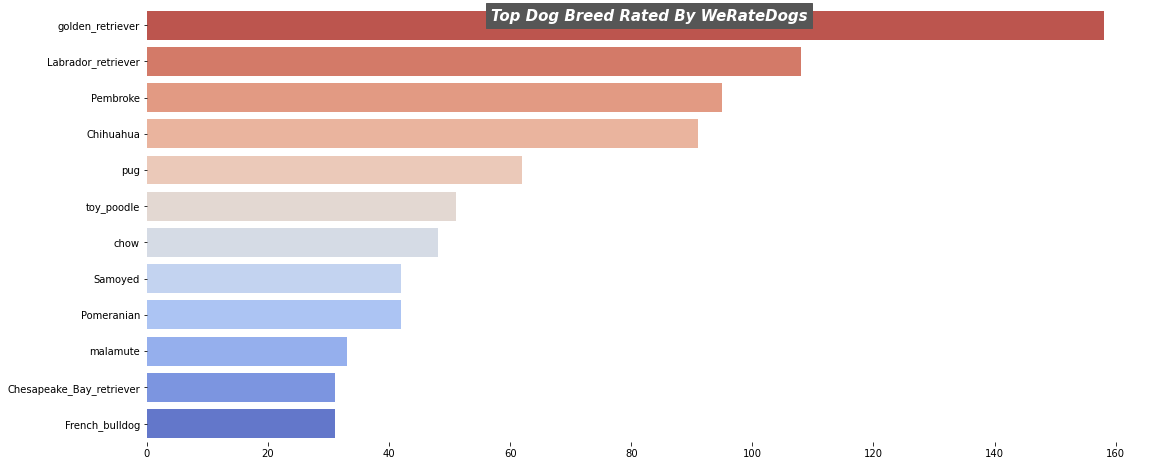

In [338]:
fig,ax = plt.subplots(figsize=(18,8))
sns.barplot(count["count"],count["dog_breed"],ax=ax,orientation='horizontal',
           order = count.sort_values('count',  ascending = False).dog_breed, palette = 'coolwarm_r')
ax.set_title('Top Dog Breed Rated By WeRateDogs',backgroundcolor ='#565656',
 fontsize=15, weight='bold',color='white',style='italic',loc='center',pad=30,y=0.9)
plt.box(False)
ax.set_xlabel('')
ax.set_ylabel('')


plt.show()

### The most common words used by WeRateDogs?

We would like to know some of the most frequent words used by WeRateDogs while tweeting, and to do this we would be visualizing all words using a wordcloud.

#####  wordcloud for all tweet

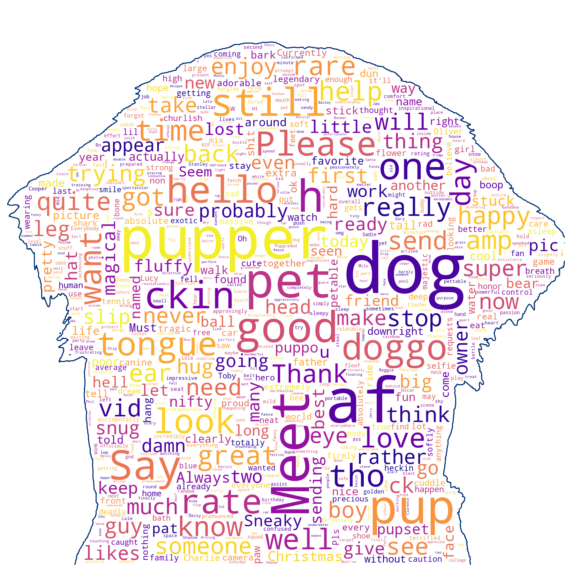

In [336]:
plt.figure( figsize=(10,15))

allwords = ' '.join( [tweet for tweet in df['text']] )
stopwords = set(STOPWORDS)
mask = np.array(Image.open(r"C:\Users\JohnInalegwu\Downloads\dog_PNG50317.png"))

wordcloud = WordCloud(collocations=False, stopwords = STOPWORDS,
                      mask=mask, background_color="white", max_words=700,max_font_size=200, 
                      contour_color='#023075',contour_width=3,colormap='plasma').generate(allwords)

plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')

plt.savefig('WeRateDog_wordcloud.png')

plt.show()

Some outstanding words from our wordcloud 'pet', 'dog', 'rate', 'hello', 'Meet' 'doggo', and 'pupper'. We can easily see series of words as frequently used by WeRateDogs, but I'm just specific about some outstanding listed above, cause they indicate what the page is all about and how it presents it's information to followers. Having no prior idea about what WeRateDogs is all aboutand also if the name does not give much information out about what it's all about, then this is what one can easily deduce from my selected outstanding words from the word colud.

**Pet**: Seeing pet signifies that most tweets are about pets. What pets?

**Dog**: Their tweets aren't just about any pets but a Dog kind of pet. Why tweet about Dogs so much?

**Rate**: We Rate Dogs, Yeah, You read that right. WeRateDogs twitter page is all about rating dogs.

**Hello**: Certainly, handlers of this twitter page don't lack matters. So they often greet and start conversations with 'hello'. After greeting what next?
       
**Meet**: You would be introduced to a Dog. A picture of a Dog is posted, that would be rated...

**Doggo** and **Pupper**: These are two different Dog growth stages and it seems, most Dogs rated on this page are in either one of this Dog stages.
       




**Lets get clarity on all Dog stages used in WeRateDogs twitter page below!**

### Most Common Dog growth stages

##### Unique stages mentioned across tweets

In [339]:
df['dog_stage'].dropna().unique()

array(['doggo', 'puppo', 'pupper', 'floofer'], dtype=object)

From the above list, we can see that aside doggo and puppo, there are still two other dog stages mentioned and rated by WeRateDogs, which are pupper and floofer

#### How each Dog stage is represented our dataset

In [340]:
dd = df['dog_stage'].value_counts().reset_index().rename(columns={'index':'dog_stage',
                                                             'dog_stage':'count'})

dd

,dog_stage,count
0,pupper,253
1,doggo,89
2,puppo,32
3,floofer,9


## How often does WeRateDogs rate Dogs?

In [341]:
date_range = len(pd.date_range(start=df['date'].min(),end=df['date'].max()))
date_count = df['date'].nunique()
diff = date_range - date_count

print(f"The timeframe of this dataset is between {df.date.min()} to {df.date.max()}, there exist {date_range} number of days within this period, and WeRateDogs rated at least a dog for {date_count} unique number of days. That is to say there are about {diff} unique number of days when not even a single Dog was      rated.\nLet's take a look at some of those days below.") 

The timeframe of this dataset is between 2015-11-15 to 2017-08-01, there exist 626 number of days within this period, and WeRateDogs rated at least a dog for 600 unique number of days. That is to say there are about 26 unique number of days when not even a single Dog was      rated.
Let's take a look at some of those days below.


##### The 26 Days where Dogs were not rated

In [342]:
date_index = df.set_index('date')

date_index.index = pd.to_datetime(date_index.index)

no_rating = pd.Series(pd.date_range(
  start=date_index.index.min(), 
    end=date_index.index.max()).difference(date_index.index))

no_rating

0    2016-04-07
1    2016-04-16
2    2016-04-18
3    2016-04-19
4    2016-04-22
5    2016-05-15
6    2016-05-22
7    2016-07-20
8    2016-08-27
9    2016-09-24
10   2016-11-13
11   2016-11-15
12   2016-12-01
13   2016-12-03
14   2016-12-16
15   2016-12-20
16   2017-02-11
17   2017-03-09
18   2017-03-12
19   2017-04-09
20   2017-04-20
21   2017-04-25
22   2017-04-29
23   2017-05-09
24   2017-05-20
25   2017-07-21
dtype: datetime64[ns]

##### Period(Month-Year) with most days when NO  rating was made

In [343]:
no_rating.dt.strftime('%b-%Y').value_counts()

Apr-2016    5
Dec-2016    4
Apr-2017    4
May-2016    2
Nov-2016    2
Mar-2017    2
May-2017    2
Jul-2016    1
Aug-2016    1
Sep-2016    1
Feb-2017    1
Jul-2017    1
dtype: int64

In April 2016, Dogs were not rated for 5 different days, and that happens to be highest number of days WeRateDogs has not rated a dog in a single month.

### Period(Month-Year) with the most tweets by WeRateDogs

In [344]:
df['date'] = pd.to_datetime(df['date'])

In [345]:
df['date'].dt.strftime('%b-%Y').value_counts()

Dec-2015    388
Nov-2015    300
Jan-2016    194
Mar-2016    136
Feb-2016    125
Jul-2016     97
Jun-2016     94
Oct-2016     73
Feb-2017     72
Jan-2017     71
Sep-2016     69
Aug-2016     63
May-2016     60
Apr-2016     60
Dec-2016     59
Nov-2016     58
Mar-2017     57
Jul-2017     53
Jun-2017     50
Apr-2017     49
May-2017     45
Aug-2017      2
Name: date, dtype: int64

### Days with the highest number of different Dogs in a single day

In [346]:
t_10 = df['date'].value_counts().sort_values(ascending=False).reset_index(drop=True)

t_10 = t_10.unique()[9]

In [347]:
df['date'].dt.strftime('%d-%b-%Y').value_counts()[df['date'].dt.strftime('%d-%b-%Y').value_counts() >=t_10]

29-Nov-2015    26
28-Nov-2015    26
16-Nov-2015    25
01-Dec-2015    24
19-Nov-2015    23
25-Nov-2015    21
23-Nov-2015    21
07-Dec-2015    21
08-Dec-2015    21
22-Nov-2015    20
20-Nov-2015    20
24-Nov-2015    18
03-Dec-2015    18
18-Nov-2015    18
10-Dec-2015    18
09-Dec-2015    17
30-Nov-2015    17
27-Nov-2015    17
21-Nov-2015    17
12-Dec-2015    16
06-Dec-2015    16
11-Dec-2015    16
15-Dec-2015    15
17-Nov-2015    15
Name: date, dtype: int64

November and December 2015 had days with the top 10 highest number of tweet count, and we can see that this resulted in the two months having the highest number of tweets posted in a month, far above the rest.

### Hour of the day with most tweets  --- VISUALIZATION

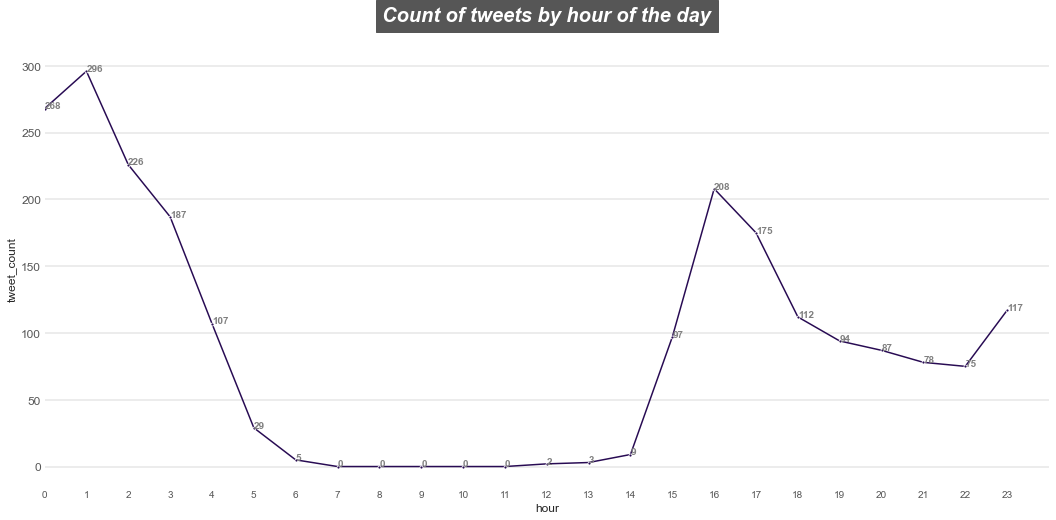

In [349]:
#Creating a dataframe for hours with tweets
hour_count = pd.to_datetime(df['time']).dt.hour.value_counts().sort_index().reset_index().rename(columns={'index':'hour',
                                                                                                         'time':'tweet_count'})

#Creating a dataframe for hours with no tweet 
no_time = pd.DataFrame({'hour':[7,8,9,10,11], 'tweet_count':0})

#Merging hourswit tweet and without tweet together
hour_count = pd.concat([hour_count,no_time]).reset_index(drop=True).sort_values('hour')

#Visualizing
fig,ax = plt.subplots(figsize=(18,8))

sns.lineplot(x='hour',y='tweet_count', marker='.', data=hour_count,ci=95,ax=ax,palette = 'coolwarm')

ax.set_title('Count of tweets by hour of the day',backgroundcolor ='#565656',
fontsize=20, weight='bold',color='white',style='italic',loc='center',pad=30)

sns.set(context='notebook', style='ticks',palette='inferno')
plt.box(False)
ax.tick_params(labelsize=12,length=0)
# add grid lines for y axis
ax.yaxis.grid(linewidth=0.3,color='grey')
# put the grid lines below bars
ax.set_axisbelow(True)

for v in hour_count.iterrows():
    plt.text(v[1][0], v[1][1], f'{v[1][1]}', size='small', color='grey', weight='bold')


plt.xticks(rotation=0,color='#565656', size = 10)
plt.yticks(color='#565656', size = 12)


ax.set_xticks(np.arange(len(hour_count)))
plt.xlim(0,24)


plt.show()

If you're a vivid fan of WeRateDogs then there are some hours of the day, you should expect no rating of dogs from them at all. Using a 12-hour format and Nigeria local time (WAT) too. Within the timeframe of this data WeRateDogs have rated dogs **2175** times, across, **3** years and in **600** different number of days and non of these ratings has ever been done within the hours of **7am and 11am**. While there have been an increase in number of tweets between **12 am and 1am** of the day, which both holds the highest number of tweets for a hour. There has also been a steady decrease of number of tweets after 1am, up to the point of **NO** tweet between **7am and 11am** of the day. After 11am, there starts to be a gradual but slow increase in number of tweets, up to 4pm in the day, and then it starts diminishing again through to 10pm, but this time not below the **50 tweets** count. By 11pm, there is an increase in number of tweets and this leads to the **peak hours** of WeRateDogs rating for dogs between **12am and 1am**.

This analysis is subject to **timezone**. So, If you're in Nigeria and you really dont want to miss those Dog ratings as they drop, then you might want to sacrifice some sleeping time. If You're a twitter influencer or a blogger whose major audience are Dog lovers, and particularly Nigeria Dog lovers, and you also have a competitor like WeRateDogs for followers, then you should really consider putting out contents on twitter between 6am and 2pm when WeRateDogs are definitely SLEEPING!!!

## Insight on the growth of  the WeRateDogs twitter account (15/11/2015- 1/8/2017)

First we would be getting the count of total number of tweets within the timeframe. Please note, for the sake of this analysis, only tweets with retweet_count and favorite_count data would be counted.

Firstly, The sum total of retweets and likes during this period, would also be gotten through 'groupby'.

Then we visualize all three result for proper insight.

Finally, we take on the conlusion of the insight.



#### Yearly tweet count

In [354]:
tweet_count = df['retweet_count'].groupby(df['date'].dt.year).count().reset_index().rename(columns={'retweet_count':
                                                                                     'tweet_count'})
tweet_count

,date,tweet_count
0,2015,687
1,2016,791
2,2017,395


####  Yearly retweet count

In [357]:
retweet_count = df['retweet_count'].groupby(df['date'].dt.year).sum().reset_index()

retweet_count

,date,retweet_count
0,2015,603018.0
1,2016,2092139.0
2,2017,1799961.0


#### Yearly like count

In [358]:
like_count = df['like_count'].groupby(df['date'].dt.year).sum().reset_index()

like_count

,date,like_count
0,2015,1489031.0
1,2016,6169727.0
2,2017,7746913.0


##### Visualizing our result

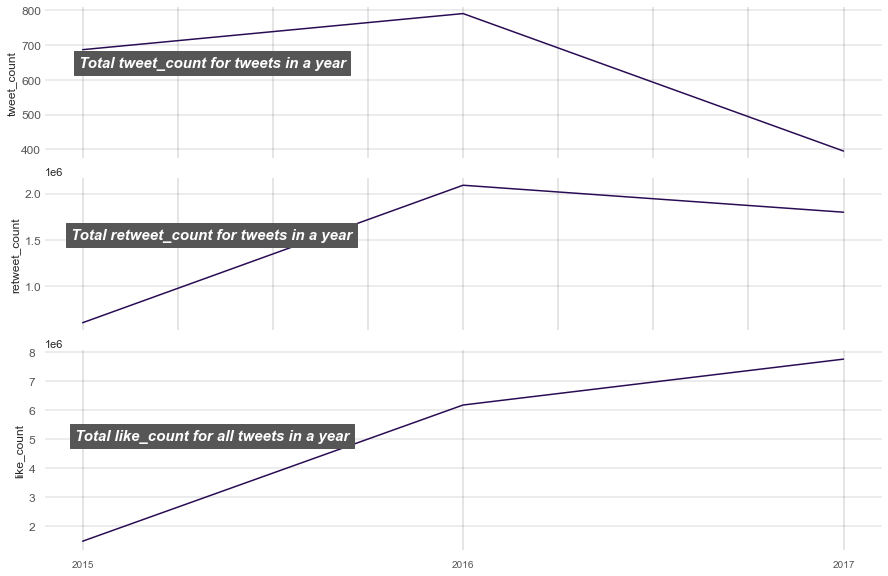

In [353]:
Grid_plot = plt.GridSpec(23, 6, wspace = 5.5,
                        hspace = 5)

fig,ax = plt.subplots(figsize=(15,10))

    
axes1 = plt.subplot(Grid_plot[:7,:])
sns.lineplot(x='date',y='tweet_count',data=tweet_count,ci=95,ax=axes1,palette = 'coolwarm')
axes1.set_title('Total tweet_count for tweets in a year',backgroundcolor ='#565656',
fontsize=15, weight='bold',color='white',style='italic',loc='center',pad=30, y=0.4, x=0.2)
sns.set(context='notebook', style='ticks',palette='inferno')
plt.box(False)
axes1.tick_params(labelsize=12,length=0)
# add grid lines for y axis
axes1.yaxis.grid(linewidth=0.3,color='grey')
axes1.xaxis.grid(linewidth=0.4,color='grey')
# put the grid lines below bars
axes1.set_axisbelow(True)
axes1.set_xlabel('')
# turn off the x axis tick labels without disturbing the originals
[lbl.set_visible(False) for lbl in axes1.get_xticklabels()]

plt.yticks(color='#565656', size = 12)


#------------------------------------------------------------------------------------------------------------------------------#

axes2 = plt.subplot(Grid_plot[7:14, :])
sns.lineplot(x='date',y='retweet_count',data=retweet_count,ci=95,ax=axes2,palette = 'coolwarm')
axes2.set_title('Total retweet_count for tweets in a year',backgroundcolor ='#565656',
fontsize=15, weight='bold',color='white',style='italic',loc='center',pad=30, y=0.4, x=0.2)
sns.set(context='notebook', style='ticks',palette='inferno')
plt.box(False)
axes2.tick_params(labelsize=12,length=0)
# add grid lines for y axis
axes2.yaxis.grid(linewidth=0.3,color='grey')
axes2.xaxis.grid(linewidth=0.4,color='grey')
# put the grid lines below bars
axes2.set_axisbelow(True)
# turn off the x axis tick labels without disturbing the originals
[lbl.set_visible(False) for lbl in axes2.get_xticklabels()]

axes2.set_xlabel('')
plt.yticks(color='#565656', size = 12)


#------------------------------------------------------------------------------------------------------------------------------#


axes3 = plt.subplot(Grid_plot[14:23, :])
sns.lineplot(x='date',y='like_count',data=like_count,ci=95,ax=axes3,palette = 'coolwarm')
axes3.set_title('Total like_count for all tweets in a year',backgroundcolor ='#565656',
fontsize=15, weight='bold',color='white',style='italic',loc='center',pad=30, y=0.4, x=0.2)
sns.set(context='notebook', style='ticks',palette='inferno')
plt.box(False)
axes3.tick_params(left=False, bottom=False)
# add grid lines for y axis
axes3.yaxis.grid(linewidth=0.3,color='grey')
axes3.xaxis.grid(linewidth=0.4,color='grey')
# removing the x axis label
axes3.set(xlabel=None)
# put the grid lines below bars
axes3.set_axisbelow(True)

plt.xticks(rotation=0,color='#565656', size = 10)
plt.yticks(color='#565656', size = 12)


locator = mdates.DayLocator(interval=1)
axes3.xaxis.set_major_locator(locator)


plt.savefig('WeRateDogs_Growth.png')

plt.show()

## Conclusion on the growth of WeRateDogs Twitter account

'WeRateDogs is a Twitter account that rates people's dogs with a humorous comment about the dog. The account was started in 2015 by college student Matt Nelson, and has received international media attention both for its popularity...'[(Wikipedia)](https://en.wikipedia.org/wiki/WeRateDogs). The above analysis and visualization gives us a proper insight of how much this twitter account has grown, since it's inception in November 15, 2015. From having over 1.4 million total LIKES❤️ in its first year in 2015, to having over 7.7 million total LIKES❤️as at August 1, 2017, is just what I can describe as a skyrocket kind of growth. Also for the retweets🔁 on this account, It has also been a positive increase for this account.